# Logistic Regression

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
data_woe = pd.read_excel(r'C:\Users\User\Desktop\default of credit card clients.xls')

pd.set_option('display.max_columns', len(data_woe.columns))
print(len(data_woe.columns) , 'columns in Data Frame')

data_woe

25 columns in Data Frame


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,male,high school,single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,male,university,single,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,male,high school,married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
data_woe.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000,30000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,NaN,2,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,female,university,single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18112,14030,15964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15000.500000,167484.322667,NaN,NaN,NaN,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,NaN,NaN,NaN,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,NaN,NaN,NaN,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,NaN,NaN,NaN,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,NaN,NaN,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,NaN,NaN,NaN,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000


In [4]:
data_woe = data_woe.drop('ID',axis=1)

In [5]:
data_woe

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,female,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,male,high school,married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,male,high school,single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,male,university,single,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,male,high school,married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [6]:
data_woe.dtypes

LIMIT_BAL     int64
SEX          object
EDUCATION    object
MARRIAGE     object
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default       int64
dtype: object

In [7]:
data_woe.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [8]:
data_woe.duplicated().sum()

35

In [9]:
data_woe.drop_duplicates(inplace=True)

In [10]:
data_woe.duplicated().sum()

0

In [11]:
abs(data_woe.corr()['default'][:-1]*100)

LIMIT_BAL    15.387104
AGE           1.361935
PAY_0        32.496376
PAY_2        26.365623
PAY_3        23.523048
PAY_4        21.655085
PAY_5        20.405913
PAY_6        18.673962
BILL_AMT1     1.975756
BILL_AMT2     1.430170
BILL_AMT3     1.418195
BILL_AMT4     1.025921
BILL_AMT5     0.685929
BILL_AMT6     0.546864
PAY_AMT1      7.301487
PAY_AMT2      5.864338
PAY_AMT3      5.631939
PAY_AMT4      5.689818
PAY_AMT5      5.519425
PAY_AMT6      5.325021
Name: default, dtype: float64

In [12]:
sum(abs(data_woe.corr()['default'][:-1]*100))

202.28390964340198

In [13]:
len(abs(data_woe.corr()['default'][:-1]*100))

20

In [14]:
sum(abs(data_woe.corr()['default'][:-1]*100))/len(abs(data_woe.corr()['default'][:-1]*100))

10.1141954821701

In [15]:
data_woe = data_woe.drop(data_woe[['AGE','BILL_AMT1','BILL_AMT2',
                                   'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                                  'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',]],axis=1)

In [16]:
data_woe

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default
0,20000,female,university,married,2,2,-1,-1,-2,-2,1
1,120000,female,university,single,-1,2,0,0,0,2,1
2,90000,female,university,single,0,0,0,0,0,0,0
3,50000,female,university,married,0,0,0,0,0,0,0
4,50000,male,university,married,-1,0,-1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,male,high school,married,0,0,0,0,0,0,0
29996,150000,male,high school,single,-1,-1,-1,-1,0,0,0
29997,30000,male,university,single,4,3,2,-1,0,0,1
29998,80000,male,high school,married,1,-1,0,0,0,-1,1


In [17]:
colls = []

for col in data_woe.columns[:-1]:
    if data_woe[col].dtypes != 'object':
        colls.append(col)

        
colls

['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_woe[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

In [19]:
vif

,VIF,Features
0,1.144305,LIMIT_BAL
1,1.874176,PAY_0
2,3.116308,PAY_2
3,3.622764,PAY_3
4,4.327319,PAY_4
5,4.828618,PAY_5
6,3.302824,PAY_6


In [20]:
data_woe.dtypes

LIMIT_BAL     int64
SEX          object
EDUCATION    object
MARRIAGE     object
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
default       int64
dtype: object

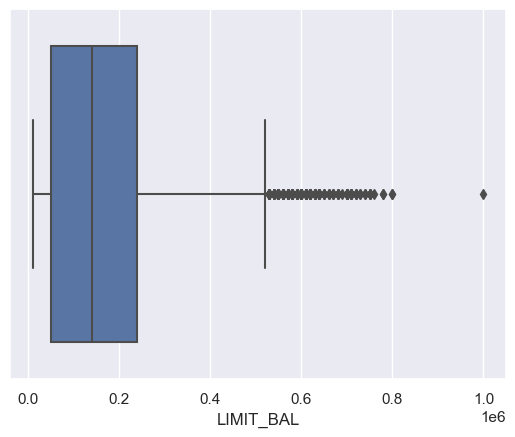

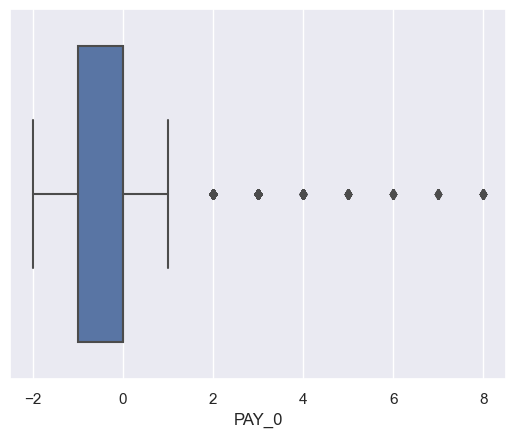

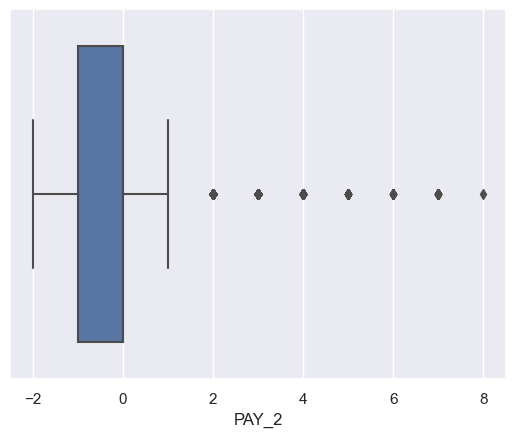

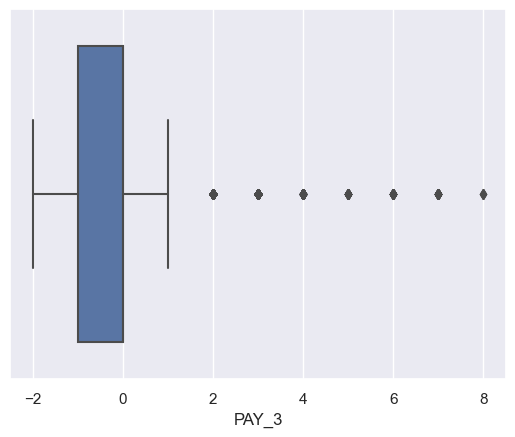

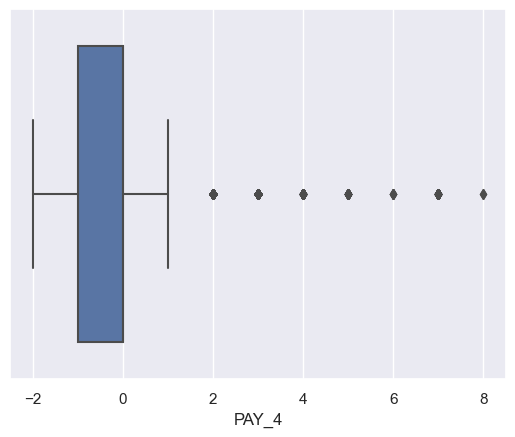

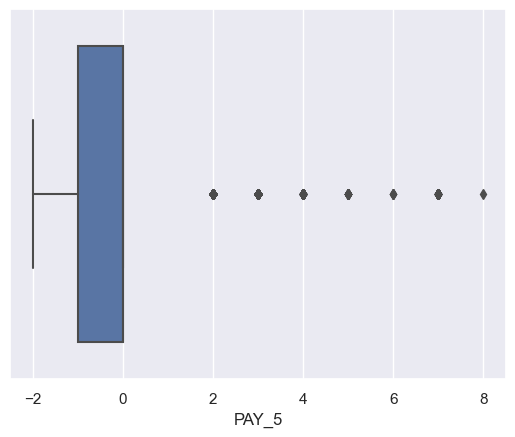

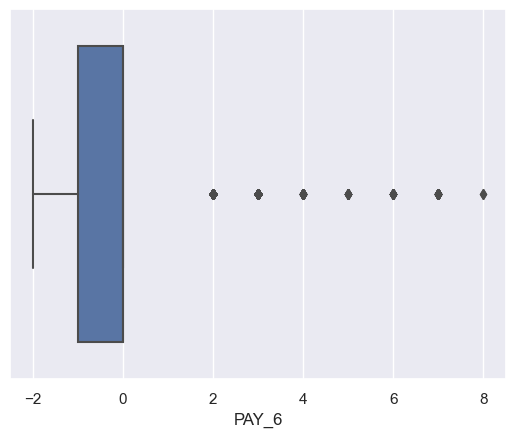

In [21]:
for i in data_woe[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]:
    sns.boxplot(data=data_woe,x=data_woe[i])
    plt.show()

In [22]:
q1 = data_woe.quantile(0.25)
q3 = data_woe.quantile(0.75)
IQR = q3-q1
Upper = q3+1.5*IQR
Lower = q1-1.5*IQR

In [23]:
for i in data_woe[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]:
    data_woe[i] = np.where(data_woe[i] > Upper[i],Upper[i],data_woe[i])
    data_woe[i] = np.where(data_woe[i] < Lower[i],Lower[i],data_woe[i])

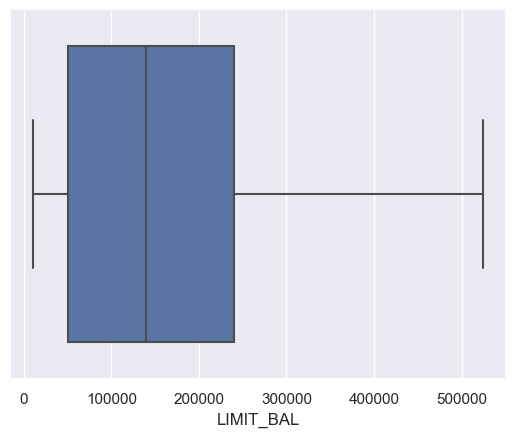

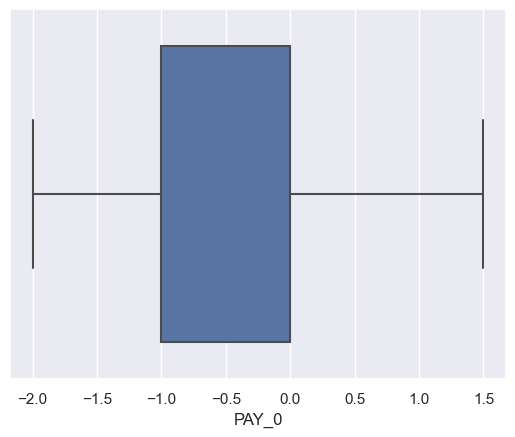

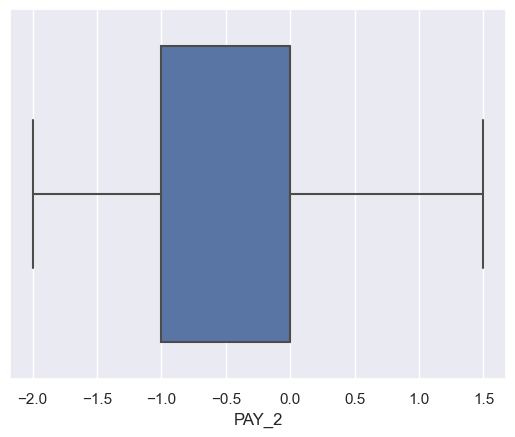

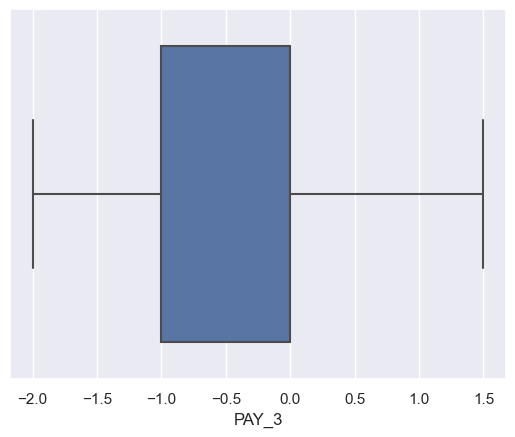

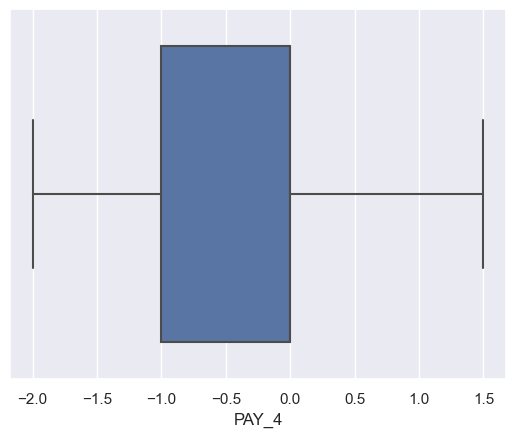

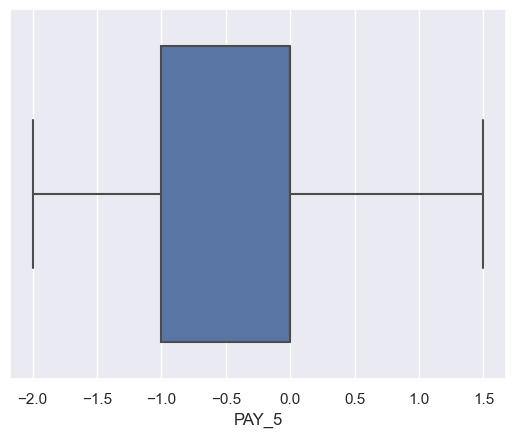

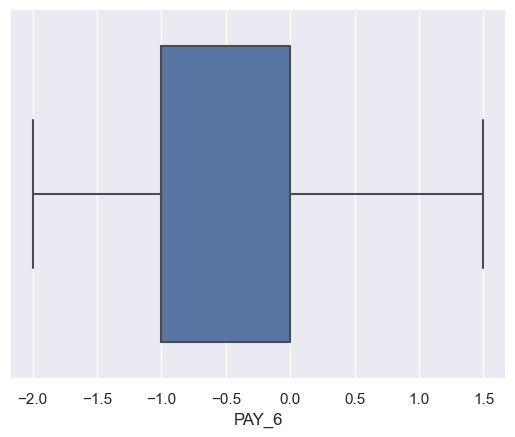

In [24]:
for i in data_woe[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]:
    sns.boxplot(data=data_woe,x=data_woe[i])
    plt.show()

In [25]:
data_woe.dtypes

LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
PAY_0        float64
PAY_2        float64
PAY_3        float64
PAY_4        float64
PAY_5        float64
PAY_6        float64
default        int64
dtype: object

In [26]:
row_data = data_woe.copy()

In [27]:
data_woe.describe(include='all')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default
count,29965.000000,29965,29965,29965,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
unique,NaN,2,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,female,university,single,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,18091,14019,15945,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,166924.567996,NaN,NaN,NaN,-0.094160,-0.230552,-0.257901,-0.302236,-0.337611,-0.362056,0.221258
std,128023.825407,NaN,NaN,NaN,0.951423,0.990704,0.994460,0.968578,0.946777,0.970007,0.415101
min,10000.000000,NaN,NaN,NaN,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000
25%,50000.000000,NaN,NaN,NaN,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,140000.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
for var in data_woe.columns[:-1]:
    if data_woe[var].dtypes != object:
        
        q1 = data_woe[var].quantile(0.25)
        q2 = data_woe[var].quantile(0.5)
        q3 = data_woe[var].quantile(0.75)

        ranges = [-np.inf, q1, q2, q3, np.inf]
        data_woe['category_' + var] = pd.cut(data_woe[var], bins=ranges, duplicates='drop')

        grouped = data_woe.groupby(['category_' + var, 'default'])['default'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
        
        grouped.rename(columns={'woe': var + '_woe'}, inplace=True)
        data_woe = data_woe.merge(grouped[['category_' + var, var + '_woe']], how='left', on='category_' + var)
        
data_woe

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,category_LIMIT_BAL,LIMIT_BAL_woe,category_PAY_0,PAY_0_woe,category_PAY_2,PAY_2_woe,category_PAY_3,PAY_3_woe,category_PAY_4,PAY_4_woe,category_PAY_5,PAY_5_woe,category_PAY_6,PAY_6_woe
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1,"(-inf, 50000.0]",-0.494762,"(0.0, inf]",-1.273653,"(0.0, inf]",-1.490626,"(-inf, -1.0]",0.341628,"(-inf, -1.0]",0.302097,"(-inf, -1.0]",0.273021,"(-inf, -1.0]",0.230868
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1,"(50000.0, 140000.0]",-0.145842,"(-inf, -1.0]",0.427600,"(0.0, inf]",-1.490626,"(-1.0, 0.0]",0.295635,"(-1.0, 0.0]",0.235880,"(-1.0, 0.0]",0.201248,"(0.0, inf]",-1.350683
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0,"(50000.0, 140000.0]",-0.145842,"(-1.0, 0.0]",0.659398,"(-1.0, 0.0]",0.406421,"(-1.0, 0.0]",0.295635,"(-1.0, 0.0]",0.235880,"(-1.0, 0.0]",0.201248,"(-1.0, 0.0]",0.201803
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0,"(-inf, 50000.0]",-0.494762,"(-1.0, 0.0]",0.659398,"(-1.0, 0.0]",0.406421,"(-1.0, 0.0]",0.295635,"(-1.0, 0.0]",0.235880,"(-1.0, 0.0]",0.201248,"(-1.0, 0.0]",0.201803
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0,"(-inf, 50000.0]",-0.494762,"(-inf, -1.0]",0.427600,"(-1.0, 0.0]",0.406421,"(-inf, -1.0]",0.341628,"(-1.0, 0.0]",0.235880,"(-1.0, 0.0]",0.201248,"(-1.0, 0.0]",0.201803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29960,220000.0,male,high school,married,0.0,0.0,0.0,0.0,0.0,0.0,0,"(140000.0, 240000.0]",0.302019,"(-1.0, 0.0]",0.659398,"(-1.0, 0.0]",0.406421,"(-1.0, 0.0]",0.295635,"(-1.0, 0.0]",0.235880,"(-1.0, 0.0]",0.201248,"(-1.0, 0.0]",0.201803
29961,150000.0,male,high school,single,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0,"(140000.0, 240000.0]",0.302019,"(-inf, -1.0]",0.427600,"(-inf, -1.0]",0.337191,"(-inf, -1.0]",0.341628,"(-inf, -1.0]",0.302097,"(-1.0, 0.0]",0.201248,"(-1.0, 0.0]",0.201803
29962,30000.0,male,university,single,1.5,1.5,1.5,-1.0,0.0,0.0,1,"(-inf, 50000.0]",-0.494762,"(0.0, inf]",-1.273653,"(0.0, inf]",-1.490626,"(0.0, inf]",-1.348629,"(-inf, -1.0]",0.302097,"(-1.0, 0.0]",0.201248,"(-1.0, 0.0]",0.201803
29963,80000.0,male,high school,married,1.0,-1.0,0.0,0.0,0.0,-1.0,1,"(50000.0, 140000.0]",-0.145842,"(0.0, inf]",-1.273653,"(-inf, -1.0]",0.337191,"(-1.0, 0.0]",0.295635,"(-1.0, 0.0]",0.235880,"(-1.0, 0.0]",0.201248,"(-inf, -1.0]",0.230868


In [29]:
for var in data_woe.columns:
    if data_woe[var].dtypes==object:
        
        grouped = data_woe.groupby([var, 'default'])['default'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

        grouped.rename(columns={'woe':var+'_woe'}, inplace=True)
        data_woe = data_woe.merge(grouped[[var,var+'_woe']], how='left', on=var)

data_woe

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,category_LIMIT_BAL,...,PAY_2_woe,category_PAY_3,PAY_3_woe,category_PAY_4,PAY_4_woe,category_PAY_5,PAY_5_woe,category_PAY_6,PAY_6_woe,SEX_woe,EDUCATION_woe,MARRIAGE_woe
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1,"(-inf, 50000.0]",...,-1.490626,"(-inf, -1.0]",0.341628,"(-inf, -1.0]",0.302097,"(-inf, -1.0]",0.273021,"(-inf, -1.0]",0.230868,0.079321,-0.091319,-0.075977
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1,"(50000.0, 140000.0]",...,-1.490626,"(-1.0, 0.0]",0.295635,"(-1.0, 0.0]",0.235880,"(-1.0, 0.0]",0.201248,"(0.0, inf]",-1.350683,0.079321,-0.091319,0.069773
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0,"(50000.0, 140000.0]",...,0.406421,"(-1.0, 0.0]",0.295635,"(-1.0, 0.0]",0.235880,"(-1.0, 0.0]",0.201248,"(-1.0, 0.0]",0.201803,0.079321,-0.091319,0.069773
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0,"(-inf, 50000.0]",...,0.406421,"(-1.0, 0.0]",0.295635,"(-1.0, 0.0]",0.235880,"(-1.0, 0.0]",0.201248,"(-1.0, 0.0]",0.201803,0.079321,-0.091319,-0.075977
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0,"(-inf, 50000.0]",...,0.406421,"(-inf, -1.0]",0.341628,"(-1.0, 0.0]",0.235880,"(-1.0, 0.0]",0.201248,"(-1.0, 0.0]",0.201803,-0.114533,-0.091319,-0.075977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29960,220000.0,male,high school,married,0.0,0.0,0.0,0.0,0.0,0.0,0,"(140000.0, 240000.0]",...,0.406421,"(-1.0, 0.0]",0.295635,"(-1.0, 0.0]",0.235880,"(-1.0, 0.0]",0.201248,"(-1.0, 0.0]",0.201803,-0.114533,-0.168670,-0.075977
29961,150000.0,male,high school,single,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0,"(140000.0, 240000.0]",...,0.337191,"(-inf, -1.0]",0.341628,"(-inf, -1.0]",0.302097,"(-1.0, 0.0]",0.201248,"(-1.0, 0.0]",0.201803,-0.114533,-0.168670,0.069773
29962,30000.0,male,university,single,1.5,1.5,1.5,-1.0,0.0,0.0,1,"(-inf, 50000.0]",...,-1.490626,"(0.0, inf]",-1.348629,"(-inf, -1.0]",0.302097,"(-1.0, 0.0]",0.201248,"(-1.0, 0.0]",0.201803,-0.114533,-0.091319,0.069773
29963,80000.0,male,high school,married,1.0,-1.0,0.0,0.0,0.0,-1.0,1,"(50000.0, 140000.0]",...,0.337191,"(-1.0, 0.0]",0.295635,"(-1.0, 0.0]",0.235880,"(-1.0, 0.0]",0.201248,"(-inf, -1.0]",0.230868,-0.114533,-0.168670,-0.075977


In [30]:
data_woe.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'default', 'category_LIMIT_BAL',
       'LIMIT_BAL_woe', 'category_PAY_0', 'PAY_0_woe', 'category_PAY_2',
       'PAY_2_woe', 'category_PAY_3', 'PAY_3_woe', 'category_PAY_4',
       'PAY_4_woe', 'category_PAY_5', 'PAY_5_woe', 'category_PAY_6',
       'PAY_6_woe', 'SEX_woe', 'EDUCATION_woe', 'MARRIAGE_woe'],
      dtype='object')

In [31]:
data_woe = data_woe.drop(data_woe[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6']],axis=1)

In [32]:
data_woe['EDUCATION_woe'] = data_woe['EDUCATION_woe'].fillna(value=data_woe['EDUCATION_woe'].mean())

In [33]:
data_woe

,default,category_LIMIT_BAL,LIMIT_BAL_woe,category_PAY_0,PAY_0_woe,category_PAY_2,PAY_2_woe,category_PAY_3,PAY_3_woe,category_PAY_4,PAY_4_woe,category_PAY_5,PAY_5_woe,category_PAY_6,PAY_6_woe,SEX_woe,EDUCATION_woe,MARRIAGE_woe
0,1,"(-inf, 50000.0]",-0.494762,"(0.0, inf]",-1.273653,"(0.0, inf]",-1.490626,"(-inf, -1.0]",0.341628,"(-inf, -1.0]",0.302097,"(-inf, -1.0]",0.273021,"(-inf, -1.0]",0.230868,0.079321,-0.091319,-0.075977
1,1,"(50000.0, 140000.0]",-0.145842,"(-inf, -1.0]",0.427600,"(0.0, inf]",-1.490626,"(-1.0, 0.0]",0.295635,"(-1.0, 0.0]",0.235880,"(-1.0, 0.0]",0.201248,"(0.0, inf]",-1.350683,0.079321,-0.091319,0.069773
2,0,"(50000.0, 140000.0]",-0.145842,"(-1.0, 0.0]",0.659398,"(-1.0, 0.0]",0.406421,"(-1.0, 0.0]",0.295635,"(-1.0, 0.0]",0.235880,"(-1.0, 0.0]",0.201248,"(-1.0, 0.0]",0.201803,0.079321,-0.091319,0.069773
3,0,"(-inf, 50000.0]",-0.494762,"(-1.0, 0.0]",0.659398,"(-1.0, 0.0]",0.406421,"(-1.0, 0.0]",0.295635,"(-1.0, 0.0]",0.235880,"(-1.0, 0.0]",0.201248,"(-1.0, 0.0]",0.201803,0.079321,-0.091319,-0.075977
4,0,"(-inf, 50000.0]",-0.494762,"(-inf, -1.0]",0.427600,"(-1.0, 0.0]",0.406421,"(-inf, -1.0]",0.341628,"(-1.0, 0.0]",0.235880,"(-1.0, 0.0]",0.201248,"(-1.0, 0.0]",0.201803,-0.114533,-0.091319,-0.075977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29960,0,"(140000.0, 240000.0]",0.302019,"(-1.0, 0.0]",0.659398,"(-1.0, 0.0]",0.406421,"(-1.0, 0.0]",0.295635,"(-1.0, 0.0]",0.235880,"(-1.0, 0.0]",0.201248,"(-1.0, 0.0]",0.201803,-0.114533,-0.168670,-0.075977
29961,0,"(140000.0, 240000.0]",0.302019,"(-inf, -1.0]",0.427600,"(-inf, -1.0]",0.337191,"(-inf, -1.0]",0.341628,"(-inf, -1.0]",0.302097,"(-1.0, 0.0]",0.201248,"(-1.0, 0.0]",0.201803,-0.114533,-0.168670,0.069773
29962,1,"(-inf, 50000.0]",-0.494762,"(0.0, inf]",-1.273653,"(0.0, inf]",-1.490626,"(0.0, inf]",-1.348629,"(-inf, -1.0]",0.302097,"(-1.0, 0.0]",0.201248,"(-1.0, 0.0]",0.201803,-0.114533,-0.091319,0.069773
29963,1,"(50000.0, 140000.0]",-0.145842,"(0.0, inf]",-1.273653,"(-inf, -1.0]",0.337191,"(-1.0, 0.0]",0.295635,"(-1.0, 0.0]",0.235880,"(-1.0, 0.0]",0.201248,"(-inf, -1.0]",0.230868,-0.114533,-0.168670,-0.075977


In [34]:
data_woe.columns

Index(['default', 'category_LIMIT_BAL', 'LIMIT_BAL_woe', 'category_PAY_0',
       'PAY_0_woe', 'category_PAY_2', 'PAY_2_woe', 'category_PAY_3',
       'PAY_3_woe', 'category_PAY_4', 'PAY_4_woe', 'category_PAY_5',
       'PAY_5_woe', 'category_PAY_6', 'PAY_6_woe', 'SEX_woe', 'EDUCATION_woe',
       'MARRIAGE_woe'],
      dtype='object')

In [35]:
X = data_woe[[
    
          'LIMIT_BAL_woe', 
          'PAY_0_woe', 
          'PAY_2_woe', 
          'PAY_3_woe',
          'PAY_4_woe',
          'PAY_5_woe',
          'PAY_6_woe',
           'SEX_woe', 
          'EDUCATION_woe',
          'MARRIAGE_woe']]


Y = data_woe['default']

In [36]:
data_woe.isnull().sum()

default               0
category_LIMIT_BAL    0
LIMIT_BAL_woe         0
category_PAY_0        0
PAY_0_woe             0
category_PAY_2        0
PAY_2_woe             0
category_PAY_3        0
PAY_3_woe             0
category_PAY_4        0
PAY_4_woe             0
category_PAY_5        0
PAY_5_woe             0
category_PAY_6        0
PAY_6_woe             0
SEX_woe               0
EDUCATION_woe         0
MARRIAGE_woe          0
dtype: int64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
def evaluate(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    print(confusion_matrix)
    print(report)

In [39]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [40]:
result = evaluate(clf, X_test, y_test)

Model Performance
Gini prob is 50.51824147747537
[[4451  222]
 [ 953  367]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4673
           1       0.62      0.28      0.38      1320

    accuracy                           0.80      5993
   macro avg       0.72      0.62      0.63      5993
weighted avg       0.78      0.80      0.77      5993



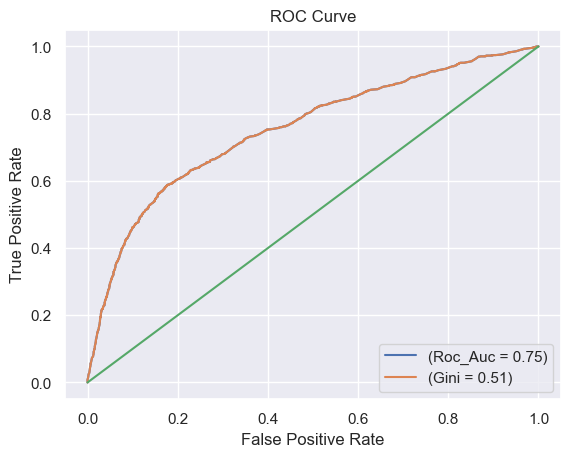

In [41]:
y_prob = clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

# Random Forest

In [42]:
row_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,0.0,0.0,0.0,0.0,0.0,0.0,0
29996,150000.0,male,high school,single,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0
29997,30000.0,male,university,single,1.5,1.5,1.5,-1.0,0.0,0.0,1
29998,80000.0,male,high school,married,1.0,-1.0,0.0,0.0,0.0,-1.0,1


In [43]:
row_data = pd.get_dummies(row_data, drop_first = True)

In [44]:
row_data

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,SEX_male,EDUCATION_high school,EDUCATION_not educated,EDUCATION_others,EDUCATION_university,MARRIAGE_others,MARRIAGE_single
0,20000.0,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1,0,0,0,0,1,0,0
1,120000.0,-1.0,1.5,0.0,0.0,0.0,1.5,1,0,0,0,0,1,0,1
2,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,1
3,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0
4,50000.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0
29996,150000.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0,1,1,0,0,0,0,1
29997,30000.0,1.5,1.5,1.5,-1.0,0.0,0.0,1,1,0,0,0,1,0,1
29998,80000.0,1.0,-1.0,0.0,0.0,0.0,-1.0,1,1,1,0,0,0,0,0


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [47]:
rfc.fit(X_train, y_train)
y_predRF = rfc.predict(X_test)
confusion_matrix(y_predRF, y_test)
accuracy_score(y_predRF, y_test)*100

79.99332554647089

In [48]:
print('AUC Score:', roc_auc_score(y_predRF, y_test)*100)

AUC Score: 70.56276635077545


In [49]:
Gini = ((roc_auc_score(y_predRF, y_test)*2)-1)*100

Gini

41.1255327015509

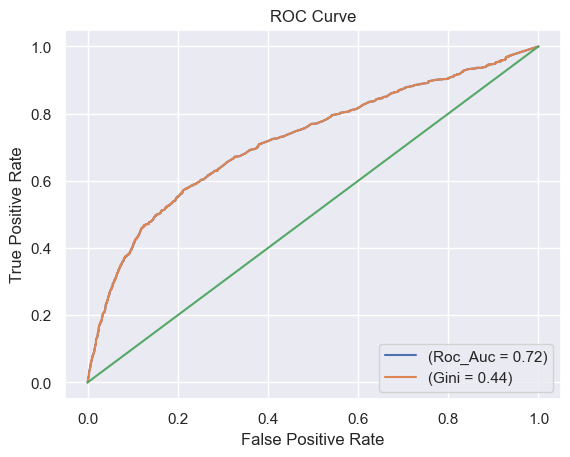

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = rfc.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

# Random Forest Optimized

In [51]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [52]:
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=1, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [53]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [54]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    
    return gini_prob

In [55]:
optimized_model = rf_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)

Model Performance
Gini prob is 52.153133085617576


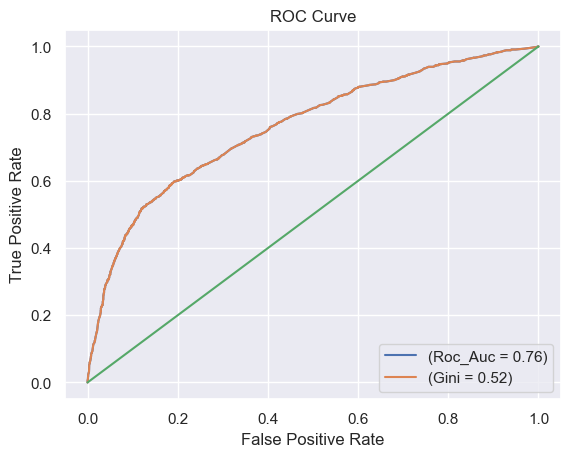

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = optimized_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

# Support Vector

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.metrics import classification_report
sns.set()

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    accuracy = accuracy_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    
    sensitivity = recall_score(y_test, y_pred)
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    
    
    print('Model Performance')
    
    print('Gini prob is', gini_prob*100)
    
    print('Accuracy is', accuracy*100)
    
    print('Confusion Matrix:', cm)
    
    print('Sensitivity is', sensitivity*100)
    print('Specificity is', specificity*100)

In [59]:
base_model = svm.SVC(probability=True)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Gini prob is 42.95046008987802
Accuracy is 80.81094610378776
Confusion Matrix: [[4447  226]
 [ 924  396]]
Sensitivity is 30.0
Specificity is 95.16370639845924


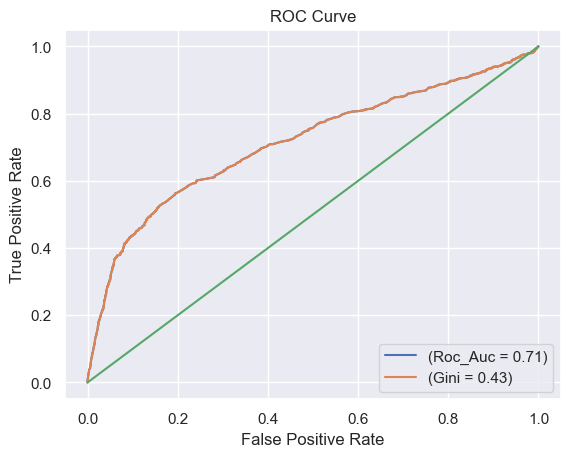

In [60]:
 from sklearn.metrics import roc_curve

y_prob_test = base_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob_test)
gini = (2*roc_auc_score(y_test, y_prob_test))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

Support Vector Optimized

In [61]:
from sklearn.model_selection import RandomizedSearchCV

kernel = ['poly', 'rbf', 'sigmoid']

gamma = ['scale', 'auto'] 

C = [1, 10, 100, 1e3, 1e4, 1e5, 1e6]

random_grid = {'kernel': kernel,
               'gamma': gamma,
               'C': C}
print(random_grid)

{'kernel': ['poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'], 'C': [1, 10, 100, 1000.0, 10000.0, 100000.0, 1000000.0]}


In [62]:
svc_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 1, cv = 3, verbose=1, n_jobs = -1)
svc_random.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=3, estimator=SVC(probability=True), n_iter=1, n_jobs=-1,
                   param_distributions={'C': [1, 10, 100, 1000.0, 10000.0,
                                              100000.0, 1000000.0],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['poly', 'rbf', 'sigmoid']},
                   verbose=1)

In [63]:
svc_random.best_params_

{'kernel': 'sigmoid', 'gamma': 'scale', 'C': 10000.0}

In [64]:
optimized_model = svc_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)

Model Performance
Gini prob is -0.5060664422958494
Accuracy is 72.58468212915068
Confusion Matrix: [[3893  780]
 [ 863  457]]
Sensitivity is 34.62121212121212
Specificity is 83.30836721592125


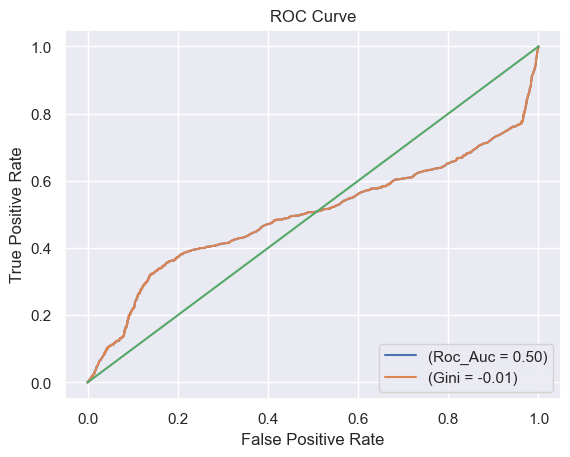

In [65]:
from sklearn.metrics import roc_curve

y_prob_test = optimized_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob_test)
gini = (2*roc_auc_score(y_test, y_prob_test))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

# Catboost

In [66]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [73]:
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train,y_train)

Learning rate set to 0.040001
0:	learn: 0.6707069	total: 8.77ms	remaining: 8.76s
1:	learn: 0.6509435	total: 17ms	remaining: 8.46s
2:	learn: 0.6327225	total: 25.6ms	remaining: 8.51s
3:	learn: 0.6169508	total: 30.3ms	remaining: 7.55s
4:	learn: 0.6015305	total: 37.4ms	remaining: 7.45s
5:	learn: 0.5874055	total: 46.2ms	remaining: 7.66s
6:	learn: 0.5749456	total: 54ms	remaining: 7.66s
7:	learn: 0.5634364	total: 59.8ms	remaining: 7.41s
8:	learn: 0.5527444	total: 65.8ms	remaining: 7.25s
9:	learn: 0.5432904	total: 72.2ms	remaining: 7.15s
10:	learn: 0.5350448	total: 76.6ms	remaining: 6.89s
11:	learn: 0.5272217	total: 82.9ms	remaining: 6.82s
12:	learn: 0.5199530	total: 88.8ms	remaining: 6.74s
13:	learn: 0.5129217	total: 94.7ms	remaining: 6.67s
14:	learn: 0.5070067	total: 101ms	remaining: 6.64s
15:	learn: 0.5012312	total: 107ms	remaining: 6.58s
16:	learn: 0.4964954	total: 112ms	remaining: 6.49s
17:	learn: 0.4917120	total: 118ms	remaining: 6.45s
18:	learn: 0.4874800	total: 123ms	remaining: 6.37s
1

In [67]:
catboost_model = CatBoostClassifier()

In [68]:
catboost_model.fit(X_train, y_train)

Learning rate set to 0.040001
0:	learn: 0.6707069	total: 152ms	remaining: 2m 32s
1:	learn: 0.6509435	total: 158ms	remaining: 1m 19s
2:	learn: 0.6327225	total: 165ms	remaining: 54.9s
3:	learn: 0.6169508	total: 169ms	remaining: 42.1s
4:	learn: 0.6015305	total: 174ms	remaining: 34.7s
5:	learn: 0.5874055	total: 181ms	remaining: 30.1s
6:	learn: 0.5749456	total: 187ms	remaining: 26.6s
7:	learn: 0.5634364	total: 193ms	remaining: 23.9s
8:	learn: 0.5527444	total: 201ms	remaining: 22.1s
9:	learn: 0.5432904	total: 207ms	remaining: 20.5s
10:	learn: 0.5350448	total: 213ms	remaining: 19.2s
11:	learn: 0.5272217	total: 222ms	remaining: 18.2s
12:	learn: 0.5199530	total: 231ms	remaining: 17.5s
13:	learn: 0.5129217	total: 237ms	remaining: 16.7s
14:	learn: 0.5070067	total: 244ms	remaining: 16s
15:	learn: 0.5012312	total: 250ms	remaining: 15.4s
16:	learn: 0.4964954	total: 255ms	remaining: 14.8s
17:	learn: 0.4917120	total: 263ms	remaining: 14.4s
18:	learn: 0.4874800	total: 268ms	remaining: 13.8s
19:	learn: 

In [69]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

result_catboost = evaluate(catboost_model, X_test, y_test)

Model Performance
Gini prob is 50.60202387668682
Accuracy is 81.16135491406641
Confusion Matrix: [[4409  264]
 [ 865  455]]
Sensitivity is 34.46969696969697
Specificity is 94.35052428846565


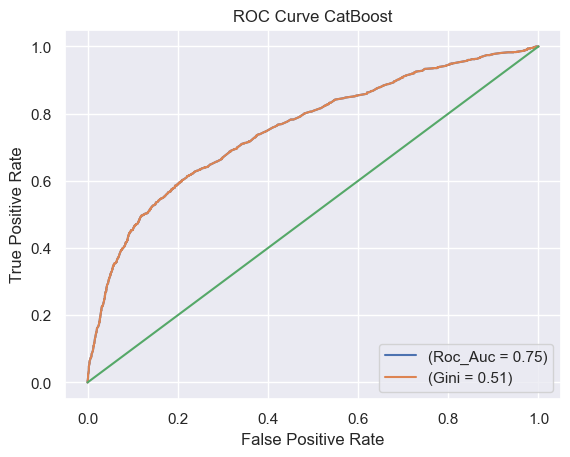

In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = catboost_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CatBoost')

plt.legend(loc='lower right')
plt.show()

Catboost Optimized

In [71]:
param_distributions = {
    'iterations': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'depth': [3, 5, 7, 9],
    'l2_leaf_reg': np.linspace(2, 30, num=7),}

param_distributions

{'iterations': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'depth': [3, 5, 7, 9],
 'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
        25.33333333, 30.        ])}

In [74]:
random_search_cb = RandomizedSearchCV(cb_clf,
                                   param_distributions=param_distributions,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_cb.fit(X_train, y_train)

0:	learn: 0.6876438	total: 6.77ms	remaining: 6.76s
1:	learn: 0.6824340	total: 15.3ms	remaining: 7.63s
2:	learn: 0.6772471	total: 22.7ms	remaining: 7.55s
3:	learn: 0.6721685	total: 30.4ms	remaining: 7.57s
4:	learn: 0.6672527	total: 37.6ms	remaining: 7.48s
5:	learn: 0.6624095	total: 46ms	remaining: 7.63s
6:	learn: 0.6576678	total: 52.9ms	remaining: 7.5s
7:	learn: 0.6536654	total: 58.6ms	remaining: 7.26s
8:	learn: 0.6490466	total: 64.8ms	remaining: 7.13s
9:	learn: 0.6445614	total: 71.8ms	remaining: 7.11s
10:	learn: 0.6402506	total: 77.5ms	remaining: 6.97s
11:	learn: 0.6361494	total: 85.9ms	remaining: 7.07s
12:	learn: 0.6320296	total: 91.5ms	remaining: 6.94s
13:	learn: 0.6279870	total: 96.6ms	remaining: 6.8s
14:	learn: 0.6240557	total: 104ms	remaining: 6.8s
15:	learn: 0.6202193	total: 109ms	remaining: 6.67s
16:	learn: 0.6165384	total: 113ms	remaining: 6.55s
17:	learn: 0.6128843	total: 119ms	remaining: 6.5s
18:	learn: 0.6092417	total: 125ms	remaining: 6.43s
19:	learn: 0.6059822	total: 130ms

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001EFBCC81A00>,
                   n_iter=1, n_jobs=-1,
                   param_distributions={'depth': [3, 5, 7, 9],
                                        'iterations': [10, 50, 100, 500, 1000],
                                        'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
       25.33333333, 30.        ]),
                                        'learning_rate': [0.01, 0.1, 1.0]},
                   random_state=42)

In [75]:
print("Best Hyperparameters for CB: ", random_search_cb.best_params_)

Best Hyperparameters for CB:  {'learning_rate': 0.01, 'l2_leaf_reg': 30.0, 'iterations': 1000, 'depth': 3}


In [76]:
optimized_model_cb = random_search_cb.best_estimator_
optmized_accuracy_cb = evaluate(optimized_model_cb, X_test, y_test)

Model Performance
Gini prob is 52.31366197822436
Accuracy is 81.52844985816786
Confusion Matrix: [[4412  261]
 [ 846  474]]
Sensitivity is 35.90909090909091
Specificity is 94.41472287609672


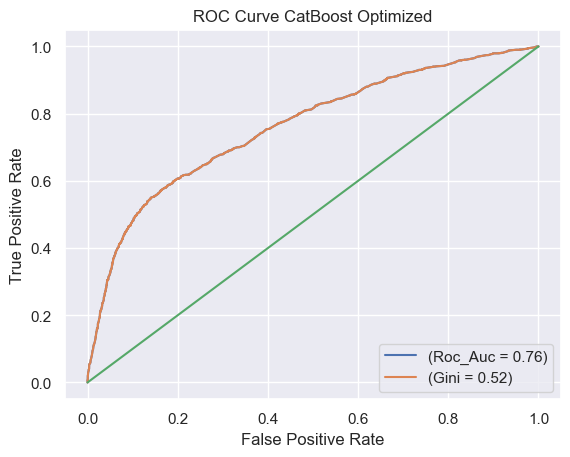

In [95]:
from sklearn.metrics import roc_curve

y_prob = optimized_model_cb.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CatBoost Optimized')

plt.legend(loc='lower right')
plt.show()

# XGB Model

In [82]:
from xgboost import XGBClassifier

In [83]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [85]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

result_xgb = evaluate(xgb_clf, X_test, y_test)

Model Performance
Gini prob is 49.32249414755301
Accuracy is 80.77757383614217
Confusion Matrix: [[4389  284]
 [ 868  452]]
Sensitivity is 34.24242424242424
Specificity is 93.9225337042585


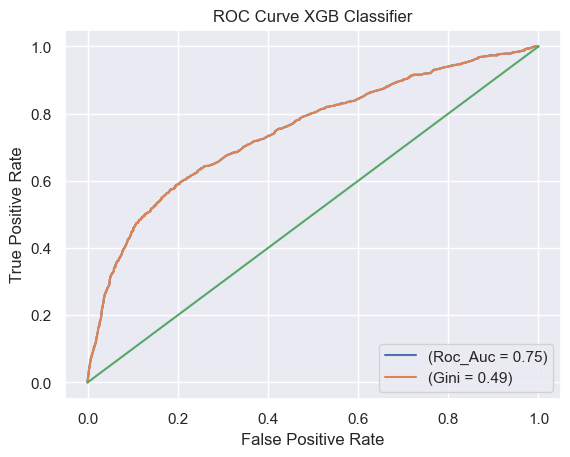

In [86]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = xgb_clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGB Classifier')

plt.legend(loc='lower right')
plt.show()

XGB Optimized

In [87]:
param_distributions = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 9],
    'subsample': np.linspace(0.5, 1, num=6), 
   
    'colsample_bytree': np.linspace(0.5, 1, num=6), 
    'gamma': [0, 1, 5]
}

param_distributions

{'n_estimators': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'max_depth': [3, 5, 7, 9],
 'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'gamma': [0, 1, 5]}

In [88]:
random_search_xgb = RandomizedSearchCV(xgb_clf,
                                   param_distributions=param_distributions,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,

In [89]:
print("Best Hyperparameters for XGB: ", random_search_xgb.best_params_)

Best Hyperparameters for XGB:  {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.5}


In [90]:
optimized_model_xgb = random_search_xgb.best_estimator_
optmized_accuracy_xgb = evaluate(optimized_model_xgb, X_test, y_test)

Model Performance
Gini prob is 51.8676925471276
Accuracy is 81.46170532287668
Confusion Matrix: [[4413  260]
 [ 851  469]]
Sensitivity is 35.53030303030303
Specificity is 94.43612240530709


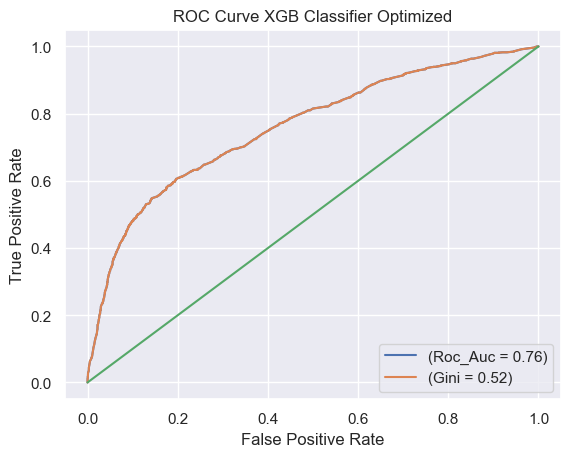

In [93]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = optimized_model_xgb.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGB Classifier Optimized')

plt.legend(loc='lower right')
plt.show()

# LGB Model

In [97]:
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 5310, number of negative: 18662
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 23972, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221508 -> initscore=-1.256898
[LightGBM] [Info] Start training from score -1.256898


LGBMClassifier()

In [98]:
result_lgb = evaluate(lgb_clf, X_test, y_test)

Model Performance
Gini prob is 51.59423250264253
Accuracy is 81.31153011847155
Confusion Matrix: [[4417  256]
 [ 864  456]]
Sensitivity is 34.54545454545455
Specificity is 94.52172052214851


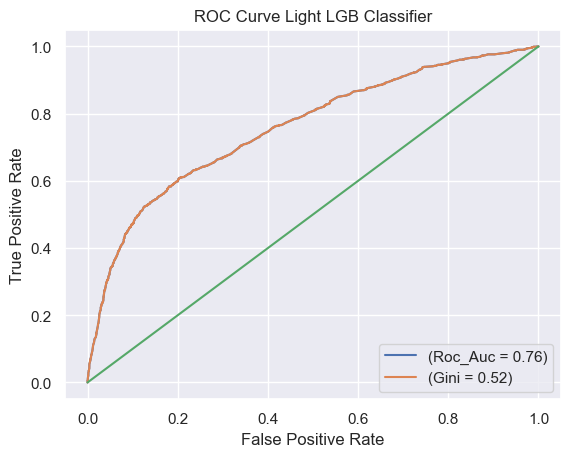

In [102]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = lgb_clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Light LGB Classifier')

plt.legend(loc='lower right')
plt.show()

LGB Optimized

In [103]:

from sklearn.model_selection import RandomizedSearchCV


param_distributions = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

param_distributions

{'n_estimators': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'max_depth': [3, 5, 7, 10],
 'num_leaves': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [104]:
random_search_lgb = RandomizedSearchCV(lgb_clf,
                                   param_distributions=param_distributions,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 5310, number of negative: 18662
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 23972, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221508 -> initscore=-1.256898
[LightGBM] [Info] Start training from score -1.256898


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=1, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000],
                                        'num_leaves': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100]},
                   random_state=42)

In [105]:
print("Best Hyperparameters for LGBM: ", random_search_lgb.best_params_)

Best Hyperparameters for LGBM:  {'num_leaves': 30, 'n_estimators': 10, 'max_depth': 7, 'learning_rate': 0.01}


In [106]:
optimized_model_lgb = random_search_lgb.best_estimator_
optmized_accuracy_lgb = evaluate(optimized_model_lgb, X_test, y_test)

Model Performance
Gini prob is 49.95895181215104
Accuracy is 77.9743033539129
Confusion Matrix: [[4673    0]
 [1320    0]]
Sensitivity is 0.0
Specificity is 100.0


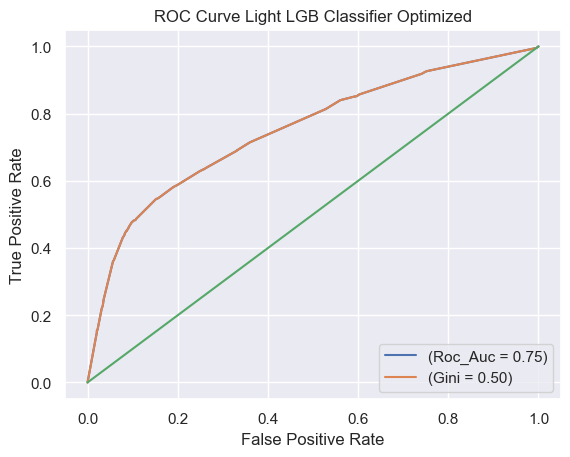

In [109]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = optimized_model_lgb.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Light LGB Classifier Optimized')

plt.legend(loc='lower right')
plt.show()

# Stacking

In [112]:
from mlxtend.classifier import StackingCVClassifier

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [113]:
base_classifiers = [
    LGBMClassifier(),
    XGBClassifier()
]


In [114]:
meta_classifier = CatBoostClassifier()

In [115]:
stacking_classifier = StackingCVClassifier(classifiers=base_classifiers,
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)

In [116]:
stacking_classifier.fit(X_train, y_train)

Fitting 2 classifiers...
Fitting classifier1: lgbmclassifier (1/2)
[LightGBM] [Info] Number of positive: 4248, number of negative: 14929
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 19177, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221515 -> initscore=-1.256857
[LightGBM] [Info] Start training from score -1.256857
[LightGBM] [Info] Number of positive: 4248, number of negative: 14929
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the tra

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Info] Number of positive: 4248, number of negative: 14930
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 19178, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221504 -> initscore=-1.256924
[LightGBM] [Info] Start training from score -1.256924
[LightGBM] [Info] Number of positive: 4248, number of negative: 14930
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 19178, number of used features: 10
[LightGBM] [Info] [binar

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished


[LightGBM] [Info] Number of positive: 5310, number of negative: 18662
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 23972, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221508 -> initscore=-1.256898
[LightGBM] [Info] Start training from score -1.256898
Learning rate set to 0.040001
0:	learn: 0.6709385	total: 7.12ms	remaining: 7.11s
1:	learn: 0.6502542	total: 14ms	remaining: 6.99s
2:	learn: 0.6322933	total: 20.4ms	remaining: 6.79s
3:	learn: 0.6151797	total: 27.2ms	remaining: 6.78s
4:	learn: 0.5997218	total: 32.8ms	remaining: 6.52s
5:	learn: 0.5863734	total: 39.2ms	remaining: 6.5s
6:	learn: 0.5736859	total: 46.1ms	remaining: 6.53s
7:	learn: 0.5617763	total: 52.9ms	remaining: 6.56s
8:	learn: 

StackingCVClassifier(classifiers=[LGBMClassifier(),
                                  XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=N...
                     

In [117]:
result_stacking = evaluate(stacking_classifier, X_test, y_test)

Model Performance
Gini prob is 50.50027884235031
Accuracy is 81.07792424495244
Confusion Matrix: [[4411  262]
 [ 872  448]]
Sensitivity is 33.939393939393945
Specificity is 94.39332334688638


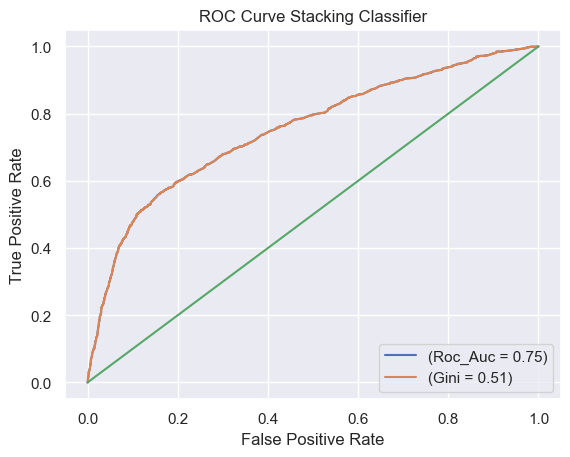

In [118]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = stacking_classifier.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Stacking Classifier')

plt.legend(loc='lower right')
plt.show()

In [1]:
import pandas as pd

data_gini = {
    'Model': ['Log.Reg', 'Random Forest', 'Random Forest Optimized', 
              'Support Vector', 'Support Vector Optimized', 
              'Catboost', 'Catboost Optimized', 
              'XGB', 'XGB Optimized', 
              'LGB', 'LGB Optimized', 
              'Stacking'],
    'Gini': [50.5, 41.1, 52.1, 43, -0.5, 50.6, 52, 49, 52, 51, 50, 50]
}

df_gini = pd.DataFrame(data_gini)

df_gini


,Model,Gini
0,Log.Reg,50.5
1,Random Forest,41.1
2,Random Forest Optimized,52.1
3,Support Vector,43.0
4,Support Vector Optimized,-0.5
5,Catboost,50.6
6,Catboost Optimized,52.0
7,XGB,49.0
8,XGB Optimized,52.0
9,LGB,51.0
